In [1]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch

import torchvision
import torchvision.transforms as transforms
device = torch.device('cuda')
print(device)
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from bessel_2dconvolutional_layers_gpu_cpu import BesselConv2d_pytorch_gpu

cuda


In [2]:
torch.cuda.device_count()

1

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=3)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=3)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda


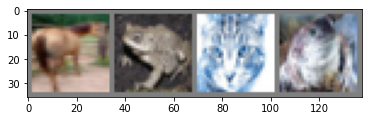

horse frog  cat   frog 


In [5]:


# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:





class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv1 =  BesselConv2d_pytorch_gpu(m_max = 5,j_max = 5,n_in=3, n_out=6, k=5, strides=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2 = BesselConv2d_pytorch_gpu(m_max = 5,j_max = 5,n_in=6, n_out=16, k=5, strides=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

C:\Users\Kuzey\Anaconda3\envs\secondart\lib\site-packages\torch\tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Net(
  (conv1): BesselConv2d_pytorch_gpu()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): BesselConv2d_pytorch_gpu()
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(20):  # loop over the dataset multiple times
    

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]
        
        inputs = inputs.to(device)
        
        labels = labels.to(device)
        
        #inputs, labels = inputs.type(torch.cuda.FloatTensor), labels.type(torch.cuda.FloatTensor)
        

        # zero the parameter gradients
        optimizer.zero_grad()
        
     

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. 
        #Specify retain_graph=True when calling backward the first time.
        loss.backward(retain_graph=True)
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


C:\Users\Kuzey\Anaconda3\envs\secondart\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[1,  2000] loss: 2.233
[1,  4000] loss: 2.191
[1,  6000] loss: 2.173
[1,  8000] loss: 2.165
[1, 10000] loss: 2.157
[1, 12000] loss: 2.147
[2,  2000] loss: 2.149
[2,  4000] loss: 2.132
[2,  6000] loss: 2.136
[2,  8000] loss: 2.137
[2, 10000] loss: 2.134
[2, 12000] loss: 2.127
[3,  2000] loss: 2.123
[3,  4000] loss: 2.127
[3,  6000] loss: 2.126
[3,  8000] loss: 2.118
[3, 10000] loss: 2.118
[3, 12000] loss: 2.121
[4,  2000] loss: 2.112
[4,  4000] loss: 2.102
[4,  6000] loss: 2.119
[4,  8000] loss: 2.109
[4, 10000] loss: 2.115
[4, 12000] loss: 2.110
[5,  2000] loss: 2.097
[5,  4000] loss: 2.115
[5,  6000] loss: 2.106
[5,  8000] loss: 2.103
[5, 10000] loss: 2.105
[5, 12000] loss: 2.106
[6,  2000] loss: 2.094
[6,  4000] loss: 2.099
[6,  6000] loss: 2.100
[6,  8000] loss: 2.095
[6, 10000] loss: 2.104
[6, 12000] loss: 2.095
[7,  2000] loss: 2.090
[7,  4000] loss: 2.098
[7,  6000] loss: 2.091
[7,  8000] loss: 2.098
[7, 10000] loss: 2.093
[7, 12000] loss: 2.087
[8,  2000] loss: 2.097
[8,  4000] 

In [9]:
PATH = './cifar_besselnet.pth'
torch.save(net.state_dict(), PATH)

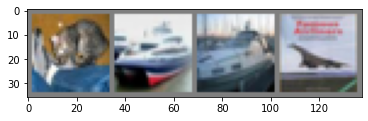

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

In [12]:
outputs = net(images.to(device))

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  plane ship  deer  deer 


In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
         # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]
        
        inputs = inputs.to(device)
        
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.to(device).size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels.to(device), predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 48.0 %
Accuracy for class: car   is 0.8 %
Accuracy for class: bird  is 21.7 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 47.9 %
Accuracy for class: dog   is 0.7 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.3 %
Accuracy for class: ship  is 9.5 %
Accuracy for class: truck is 2.9 %
